***in this assignment I did ques4, ques1,ques2,ques3,ques5,ques6,ques7 in this order***

***Q4 : We are providing you churn dataset and we expect you to apply logistic regression on it and try to change the hyperparameters so that you can get the best possible acuracy***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [2]:
df = pd.read_csv('ChurnData (7) (1).csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
pd.isnull(df).sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [4]:
x = df.drop(['churn'], axis=1)
y = df['churn']

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.25, random_state=11)

In [6]:
# Define the hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [7]:
# Initialize the logistic regression model
model = LogisticRegression()

In [8]:
# Initialize the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [9]:
# Fit the grid search object on the training data
grid_search.fit(train_X, train_Y)

C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_so

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [10]:
# Print the best hyperparameters combination and the corresponding score
print('Best hyperparameters combination:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters combination: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.7866666666666667


In [11]:
# Train the logistic regression model using the best hyperparameters found
model = LogisticRegression(**grid_search.best_params_)
model.fit(train_X, train_Y)

LogisticRegression(C=100, solver='liblinear')

In [12]:
# Predict the labels of the test data using the trained model
pred_y = model.predict(test_X)

In [13]:
# Compute the accuracy of the model on the test data
accuracy = accuracy_score(test_Y, pred_y)
print('Accuracy:', accuracy)

Accuracy: 0.7


<AxesSubplot:>

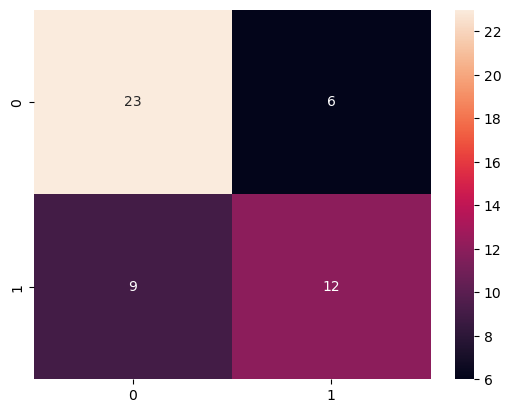

In [14]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(test_Y, pred_y)
sns.heatmap(conf_matrix, annot=True, fmt='d')

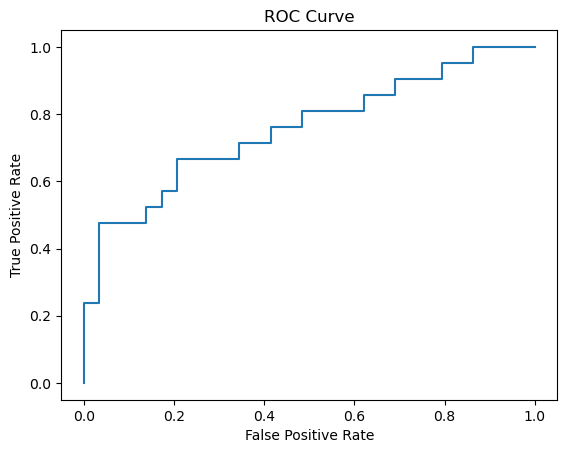

In [15]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(test_Y, model.predict_proba(test_X)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

***Q1 : By Taking reference of the Housing Price Dataset plot each independent variable with the dependent variable and store the name of independent variable in a list which show non linear behavior***

In [16]:
#checking for non linear behavior


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [17]:
# Load data from a CSV file
data = pd.read_csv("C:/Users/SABNAM NAYAK/Downloads/houseRegressionStudents (1) (1).csv")

In [18]:
#split our data into train test
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [19]:
#modelling
regr = LinearRegression()
train_x = np.asanyarray(train[['MSSubClass','LotArea','EnclosedPorch','MoSold','YrSold']])
train_y = np.asanyarray(train[['SalePrice']])
regr.fit (train_x, train_y)

LinearRegression()

In [21]:
predicted = regr.predict([[330, 130, 30, 40, 50]])
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print(predicted)

Coefficients:  [[-8.88891778e+01  1.85458745e+00 -1.48530912e+02  1.50322674e+03
  -1.96361792e+03]]
Intercept:  [4102294.59086724]
[[4030694.50469847]]


In [22]:
#now time to test my data
from sklearn.metrics import r2_score

x_test = test[['MSSubClass','LotArea','EnclosedPorch','MoSold','YrSold']]
y_test = test[['SalePrice']]

y_hat = regr.predict(x_test)

y_test = np.asanyarray(y_test)

T = np.mean((y_hat-y_test)**2)
print("residual sum of squares:", T)

residual sum of squares: 5032255067.548551


C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [23]:
#NOW R2Score
accuracy = r2_score(y_hat,y_test)
print("R2-Score is:", accuracy)

R2-Score is: -24.159376239293092


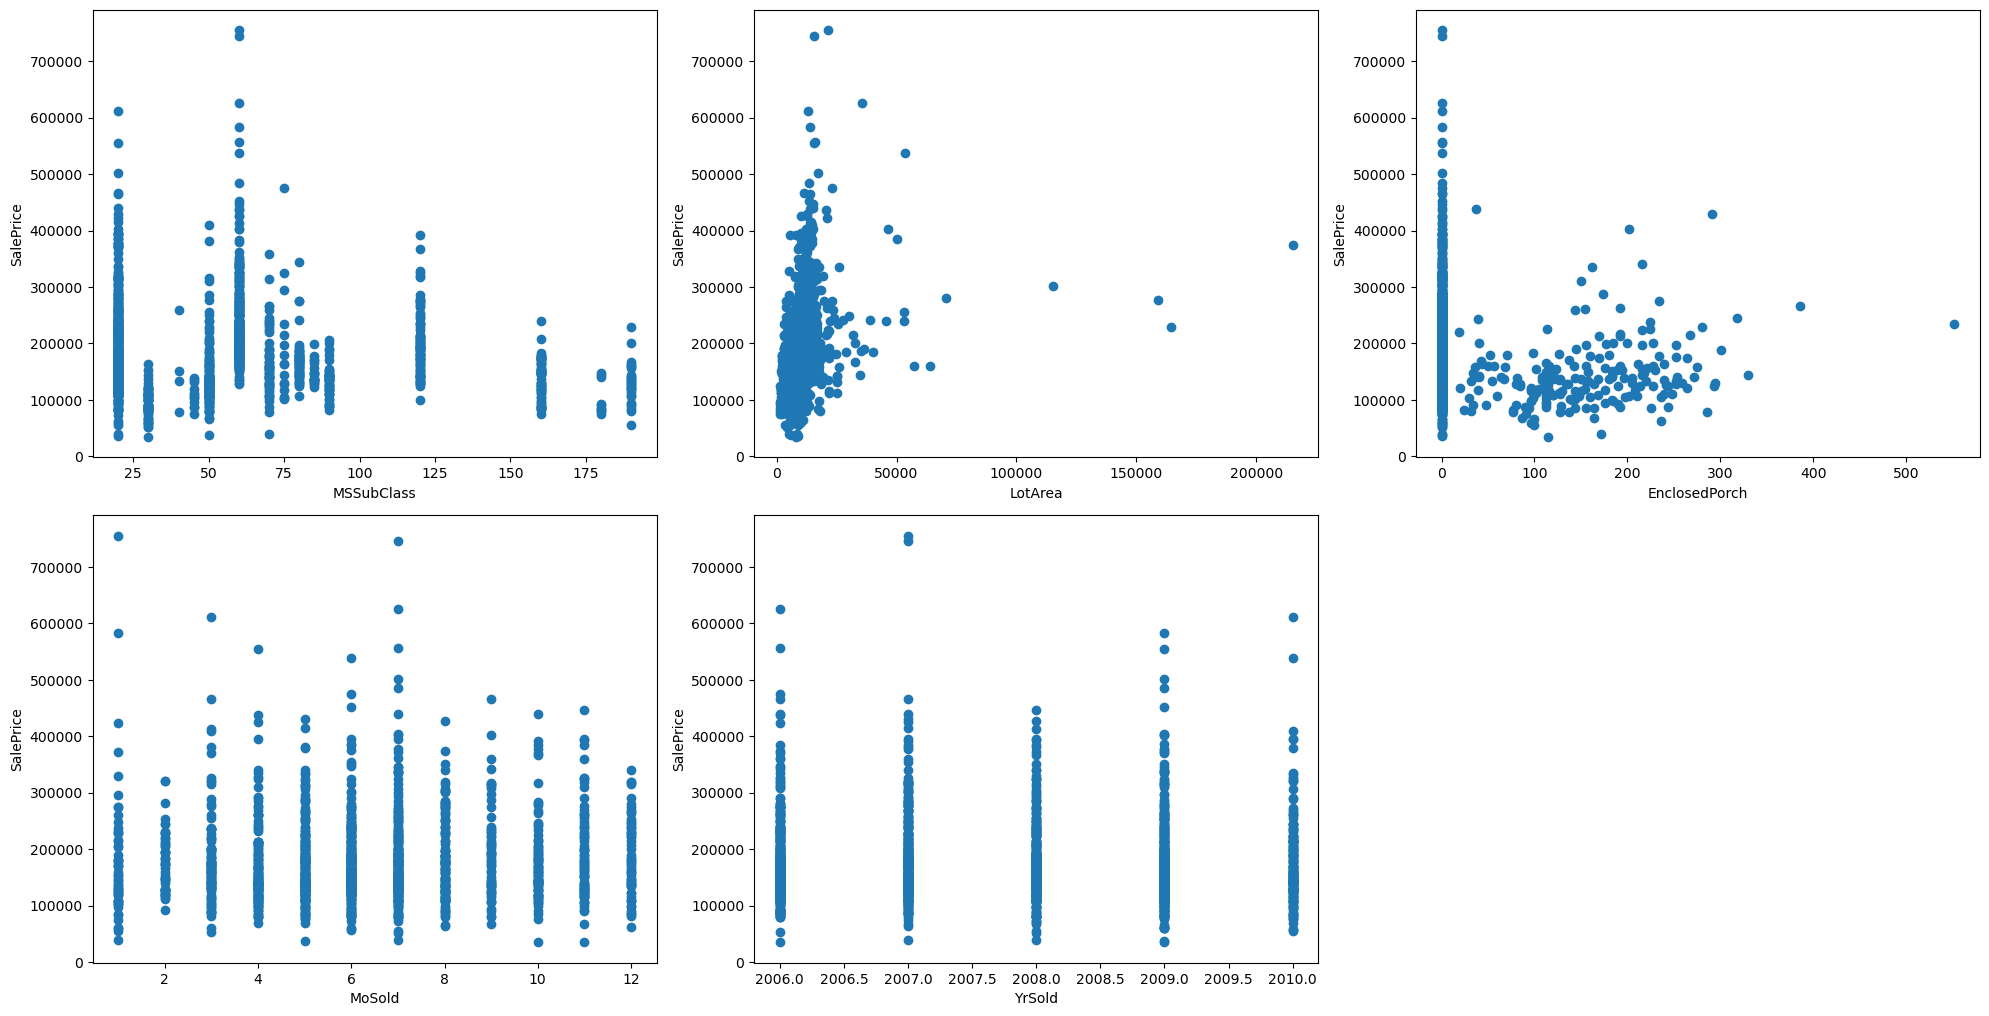

In [24]:
import matplotlib.pyplot as plt

# Plotting the independent variables against dependent variable
plt.figure(figsize=(20,25))

columns = ['MSSubClass', 'LotArea', 'EnclosedPorch', 'MoSold', 'YrSold']
for i, col in enumerate(columns):
    plt.subplot(5, 3, i+1)
    plt.scatter(data[col], data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [27]:
non_linear_vars = []
columns = ['MSSubClass', 'LotArea', 'EnclosedPorch', 'MoSold', 'YrSold']
for col in columns:
    X = data[[col]]
    y = data['SalePrice']
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"R-squared score for {col}: {r2}")
    if r2 < 0.5:
        non_linear_vars.append(col)
        print(f"Adding {col} to non_linear_vars list")
    

print("variables with non-linear values are:", non_linear_vars)

R-squared score for MSSubClass: 0.007103815434038263
Adding MSSubClass to non_linear_vars list
R-squared score for LotArea: 0.0696133153821118
Adding LotArea to non_linear_vars list
R-squared score for EnclosedPorch: 0.01653229126440925
Adding EnclosedPorch to non_linear_vars list
R-squared score for MoSold: 0.0021559533965250788
Adding MoSold to non_linear_vars list
R-squared score for YrSold: 0.0008365159328426186
Adding YrSold to non_linear_vars list
variables with non-linear values are: ['MSSubClass', 'LotArea', 'EnclosedPorch', 'MoSold', 'YrSold']


***Q2 : Columns which showed non linear behavior apply Polynomial Linear Regression to it ...***
	Note : If there is None column which is showing Non Linear Behavior you can take anyone of the column as independent variable and apply Polynomial Linear Regression to it

In [28]:
#ques2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [29]:
data = pd.read_csv("C:/Users/SABNAM NAYAK/Downloads/houseRegressionStudents (1) (1).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1460 non-null   int64 
 1   Id             1460 non-null   int64 
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [30]:
# Split our data into train and test
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['LotArea']])
train_y = np.asanyarray(train[['SalePrice']])

test_x = np.asanyarray(test[['LotArea']])
test_y = np.asanyarray(test[['SalePrice']])

In [32]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

In [33]:
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  5.96890171e+00 -2.67882413e-05]]
Intercept:  [124380.78508779]


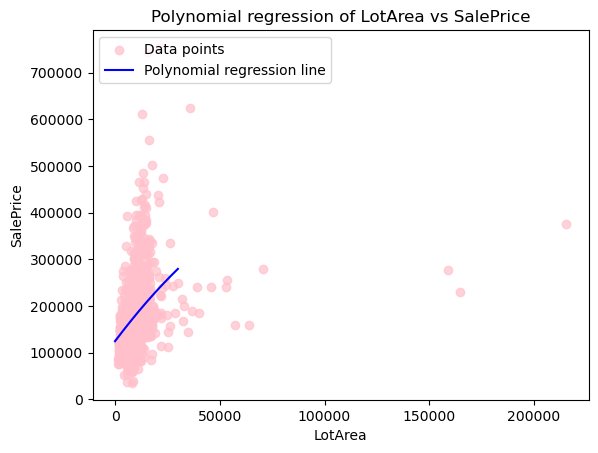

In [34]:
plt.scatter(train.LotArea, train.SalePrice, color='pink', alpha=0.7, label='Data points')
XX = np.arange(0.0, 30000.0, 10)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, color='blue', label='Polynomial regression line')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Polynomial regression of LotArea vs SalePrice")
plt.legend(loc='upper left')
plt.show()

***Q3 : Apply multi Linear regression to the Housing Price Data Set***
	***Note : you can take any number of Independent Variable***
	***Note :  You need to make 3 models atleast with different number of indepent variable***
	***Note : Try to get the best posible accuracy***

In [35]:
#Ques 3
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
# Load the data
data = pd.read_csv("C:/Users/SABNAM NAYAK/Downloads/houseRegressionStudents (1) (1).csv")

In [47]:
# First model with two independent variables
X1 = data[['OverallQual', 'GrLivArea']]
y = data['SalePrice']

# Split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Fit the model
reg1 = LinearRegression()
reg1.fit(X1_train_scaled, y_train)

# Evaluate the model
y_pred1 = reg1.predict(X1_test_scaled)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 R^2 score: {r2_1:.2f}")

Model 1 R^2 score: 0.75


In [48]:
# Second model with three independent variables
X2 = data[['OverallQual', 'GrLivArea', 'GarageCars']]

# Split the data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Standardize the data
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Fit the model
reg2 = LinearRegression()
reg2.fit(X2_train_scaled, y_train)

# Evaluate the model
y_pred2 = reg2.predict(X2_test_scaled)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 R^2 score: {r2_2:.2f}")

Model 2 R^2 score: 0.76


In [49]:
# Third model with four independent variables
X3 = data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]

# Split the data into training and testing sets
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Standardize the data
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Fit the model
reg3 = LinearRegression()
reg3.fit(X3_train_scaled, y_train)

# Evaluate the model
y_pred3 = reg3.predict(X3_test_scaled)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 R^2 score: {r2_3:.2f}")

Model 3 R^2 score: 0.79


***Q5 : We are providing you the cell dataset and we expect you to use all the independent variables for creating the SVM machine learning model and change the hyperparameters so that you can get the best accuracy***

In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [51]:
cell_df = pd.read_csv("cell_samples (3) (1).csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [52]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [53]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [54]:
cell_df.drop('BareNuc', axis=1, inplace= True)
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,2
696,888820,5,10,10,3,7,8,10,2,4
697,897471,4,8,6,4,3,10,6,1,4


In [55]:
feature_df = cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BlandChrom','NormNucl','Mit']]
feature_df #independentVariable

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1
695,2,1,1,1,2,1,1,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


In [56]:
feature_df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BlandChrom     int64
NormNucl       int64
Mit            int64
dtype: object

In [57]:
x = np.asanyarray(feature_df)
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [58]:
#traintestsplit
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=50)
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (559, 8) (559,)
test set: (140, 8) (140,)


In [59]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2])

In [60]:
#evaluation
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average = 'weighted')

0.9425054112554112

In [61]:
#Another Try with RBF

clf2=svm.SVC(kernel='rbf')
clf2.fit(x_train, y_train)
yhat2=clf2.predict(x_test)
print("RBF f1_score: %.4f" %f1_score(y_test, yhat2, average="weighted"))

RBF f1_score: 0.9714


***Ques6: Take the same cell Dataset and instead of SVM apply logistic regression in it..***

In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("cell_samples (3) (1).csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [65]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [66]:
z = df.drop(['Class'], axis=1)
x = z.drop(['BareNuc'], axis=1)
y = df['Class']
x

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,1000025,5,1,1,1,2,3,1,1
1,1002945,5,4,4,5,7,3,2,1
2,1015425,3,1,1,1,2,3,1,1
3,1016277,6,8,8,1,3,3,7,1
4,1017023,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1
695,841769,2,1,1,1,2,1,1,1
696,888820,5,10,10,3,7,8,10,2
697,897471,4,8,6,4,3,10,6,1


In [67]:
x.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BlandChrom     int64
NormNucl       int64
Mit            int64
dtype: object

In [68]:
X = np.asanyarray(x)
df['Class'] = df['Class'].astype('int')
Y = np.asarray(df['Class'])

In [69]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=41)

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_X,train_Y)

pred_y=model.predict(test_X)
pred_y

array([4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2])

In [71]:
test_Y

array([4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
test_X

array([[1223793,       6,      10, ...,       8,      10,       2],
       [1355260,       1,       1, ...,       2,       1,       1],
       [1285531,       1,       1, ...,       3,       1,       1],
       ...,
       [1106095,       4,       1, ...,       3,       1,       1],
       [1331405,       4,       1, ...,       3,       2,       1],
       [1223003,       5,       3, ...,       2,       1,       1]],
      dtype=int64)

In [73]:
df2 = pd.DataFrame({'Actual': test_Y, 'Predicted': pred_y.flatten()})
df2

,Actual,Predicted
0,4,4
1,2,2
2,2,2
3,2,4
4,4,2
...,...,...
170,2,2
171,2,4
172,2,2
173,2,2


<AxesSubplot:>

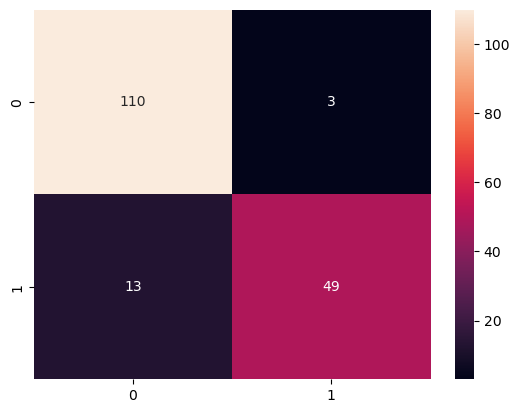

In [74]:
from sklearn import metrics
import seaborn as sns
metrics.confusion_matrix(pred_y,test_Y)
sns.heatmap(metrics.confusion_matrix(pred_y,test_Y), annot=True,fmt='d')

In [75]:
from sklearn import metrics
metrics.accuracy_score(pred_y,test_Y)

0.9085714285714286

***Q7 : we are providing you a dataset apart from churn and cell dataset which is titanic dataset remove unnecessary column which are not usefull  with aspect of machine learning and apply label encoding where ever its necessary and store processed data into your memory
	NOTE : Survived is the dependent Column***


In [87]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [88]:
data=pd.read_csv('train_ titanic dataset .csv')
data


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [89]:
data.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

***Since we have no missing values in here we can move further

In [90]:
data.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [91]:
categorical_cols=['Name','Sex','Ticket','Embarked']
#No. of unique values
data[categorical_cols].nunique()

Name        712
Sex           2
Ticket      541
Embarked      3
dtype: int64

In [92]:
#onehotencoding
pd.get_dummies(data['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [93]:
data = data.drop(['Name','Ticket',], axis=1)
data

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,2,1,1,female,38.0,1,0,71.2833,C
2,2,3,1,3,female,26.0,0,0,7.9250,S
3,3,4,1,1,female,35.0,1,0,53.1000,S
4,4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,female,39.0,0,5,29.1250,Q
708,886,887,0,2,male,27.0,0,0,13.0000,S
709,887,888,1,1,female,19.0,0,0,30.0000,S
710,889,890,1,1,male,26.0,0,0,30.0000,C


In [94]:
#map function

data['Embarked'].map({'Q': 0, 'S': 1, 'C':2})

0      1
1      2
2      1
3      1
4      1
      ..
707    0
708    1
709    1
710    2
711    0
Name: Embarked, Length: 712, dtype: int64

In [95]:
data['Embarked'] = data['Embarked'].map({'Q': 0, 'S': 1, 'C':2})
data['Embarked'].head()

0    1
1    2
2    1
3    1
4    1
Name: Embarked, dtype: int64

In [96]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,1
1,1,2,1,1,female,38.0,1,0,71.2833,2
2,2,3,1,3,female,26.0,0,0,7.9250,1
3,3,4,1,1,female,35.0,1,0,53.1000,1
4,4,5,0,3,male,35.0,0,0,8.0500,1


In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(data['Sex'])
data['Sex'] = gender_encoded
data

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,1
1,1,2,1,1,0,38.0,1,0,71.2833,2
2,2,3,1,3,0,26.0,0,0,7.9250,1
3,3,4,1,1,0,35.0,1,0,53.1000,1
4,4,5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,0,39.0,0,5,29.1250,0
708,886,887,0,2,1,27.0,0,0,13.0000,1
709,887,888,1,1,0,19.0,0,0,30.0000,1
710,889,890,1,1,1,26.0,0,0,30.0000,2


***Q8 : Use that processed titanic dataset and apply svm in it 

In [98]:
feature_df = data[['PassengerId','Pclass','Sex','Age','Embarked']]
feature_df

,PassengerId,Pclass,Sex,Age,Embarked
0,1,3,1,22.0,1
1,2,1,0,38.0,2
2,3,3,0,26.0,1
3,4,1,0,35.0,1
4,5,3,1,35.0,1
...,...,...,...,...,...
707,886,3,0,39.0,0
708,887,2,1,27.0,1
709,888,1,0,19.0,1
710,890,1,1,26.0,2


In [99]:
x = np.asanyarray(feature_df)
data['Survived'] = data['Survived'].astype('int')
y = np.asarray(data['Survived'])

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=50)
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (569, 5) (569,)
test set: (143, 5) (143,)


In [101]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average = 'weighted')

0.4517054997404342

In [103]:
clf2=svm.SVC(kernel='rbf')
clf2.fit(x_train, y_train)
yhat2=clf2.predict(x_test)
print("RBF f1_score: %.4f" %f1_score(y_test, yhat2, average="weighted"))

RBF f1_score: 0.4517
